In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt

In [2]:
telecom_df = pd.read_csv("data/telco-Customer-Churn.csv")

In [3]:
telecom_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Gettting the information of all the features 

In [4]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### All the necessary functions

In [5]:
def display_summary(df, column_name):
    '''
        Function to display summary of each columns
        
        :params: 
            df : dataframe
            column_name : a column name of a dataframe
        
        :return:
            a dataframe with value counts of unique values of a each column
    '''
    print("*"*20)
    print(column_name)
    print("*"*20)
    print("No. of unique value for column '{}'::{}".format(column_name, len(df[column_name].unique())))
    print("\n")
    display_df = df[column_name].value_counts()
    print(display_df)
    print("="*50)
    return display_df
    
def get_summary(df, all_features = True, feature_name = None):
    '''
        Function to get the value counts of all the columns or a single column of a Dataframe
        
        :params:
            df : a dataframe 
            all_features : True to get the summary of all the columns and False to get the summary of single column Default: True
            feature_name : name of a column to get the summary. Default: None
    '''
    if all_features:
        for column in df.columns:
            display_summary(df, column)
    else:
        summary_df = display_summary(df, feature_name)
        return summary_df
    
def barplot(x, y, df, title):
    '''
        Function to plot the bar chart from a given dataframe
        
        :param:
            x : the values for x axis of the bar plot
            y : the values for y axis of the bar plot
            df : a dataframe
            title : title of the barplot
    '''
    fig, axes = plt.subplots(figsize=(8,5))
    sns.set_theme(style="whitegrid")
    ax = sns.barplot(x=x, y=y, data=df)
    
    ax.set_title(title)
    ax.tick_params(axis='x', rotation=30)
    for index, row in df.iterrows():
        ax.text(row.name,row[y], round(row[y],2), color='black', ha="center")

In [6]:
get_summary(telecom_df)

********************
customerID
********************
No. of unique value for column 'customerID'::7043


7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64
********************
gender
********************
No. of unique value for column 'gender'::2


Male      3555
Female    3488
Name: gender, dtype: int64
********************
SeniorCitizen
********************
No. of unique value for column 'SeniorCitizen'::2


0    5901
1    1142
Name: SeniorCitizen, dtype: int64
********************
Partner
********************
No. of unique value for column 'Partner'::2


No     3641
Yes    3402
Name: Partner, dtype: int64
********************
Dependents
********************
No. of unique value for column 'Dependents'::2


No     4933
Yes    2110
Name: Dependents, dtype: int64
********************
tenure
********************
No. of 

### Data transformation

- Total charge column is in object format so it needs transformation to numeric format

In [7]:
# Converting Total Charges to a numerical data type.
telecom_df.TotalCharges = pd.to_numeric(telecom_df.TotalCharges, errors='coerce')
# telecom_df.isnull().sum()

### Summarizing Missing Values  
After data transformation or data cleaning is performed, the summary of the data needs to check again to ensure everything is good with the data. For instance, we might want to look at the total number of missing values for each feature.

In [8]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
telecom_df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

### Missing values  

- Some missing values are found in TotalCharges column i.e. 11 of the datas are missing.  
- Here’s some typical reasons why data is missing:  
    - User forgot to fill in a field.  
    - Data was lost while transferring manually from a legacy database.  
    - There was a programming error.  
    - Users chose not to fill out a field tied to their beliefs about how the results would be used or interpreted.  

In [10]:
# Replace using median 
median = telecom_df['TotalCharges'].median()
telecom_df['TotalCharges'].fillna(median, inplace=True)

In [11]:
telecom_df_1 = telecom_df.iloc[:,1:]
#Converting the predictor variable in a binary numeric variable
telecom_df_1['Churn'].replace(to_replace='Yes', value=1, inplace=True)
telecom_df_1['Churn'].replace(to_replace='No',  value=0, inplace=True)


### Labelling the categorical values

- Two different ways to encode the categorical value
    - **Label encoder** 
        - Label Encoding is a popular encoding technique for handling categorical variables. In this technique, each label is assigned a unique integer based on alphabetical ordering.
        - But, when label encoding is performed, the categorical values are ranked based on the alphabets.
        - Due to this, there is a very high probability that the model captures the relationship between categorical values i.e. monthwise < one year contract < two year contract  
        
    - **One Hot encoder**
        - One-Hot Encoding is another popular technique for treating categorical variables. 
        - It simply creates additional features based on the number of unique values in the categorical feature.
        - Every unique value in the category will be added as a feature.
        - One-Hot Encoding is the process of creating dummy variables.

In [12]:
# Converting all the categorical variables into dummy variables
telecom_df_dummies = pd.get_dummies(telecom_df_1)
telecom_df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [13]:
get_summary(telecom_df)

********************
customerID
********************
No. of unique value for column 'customerID'::7043


7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64
********************
gender
********************
No. of unique value for column 'gender'::2


Male      3555
Female    3488
Name: gender, dtype: int64
********************
SeniorCitizen
********************
No. of unique value for column 'SeniorCitizen'::2


0    5901
1    1142
Name: SeniorCitizen, dtype: int64
********************
Partner
********************
No. of unique value for column 'Partner'::2


No     3641
Yes    3402
Name: Partner, dtype: int64
********************
Dependents
********************
No. of unique value for column 'Dependents'::2


No     4933
Yes    2110
Name: Dependents, dtype: int64
********************
tenure
********************
No. of 

### Correlation 

- Checking the correlation of Churn with other features
- From the correlation graph, it is clear that the correlation of Churn with Monthwise contract, a user who is not into online security and not taking any kind of technical support have positive correlation
- And, correlation of churn with tenure, user with two-year contract is highly negative
- This means customer who are in month-to-month contract has a high chance of dropping the service
- Suprisingly, people who are not taking internet service have negative correlation with churn

<AxesSubplot:>

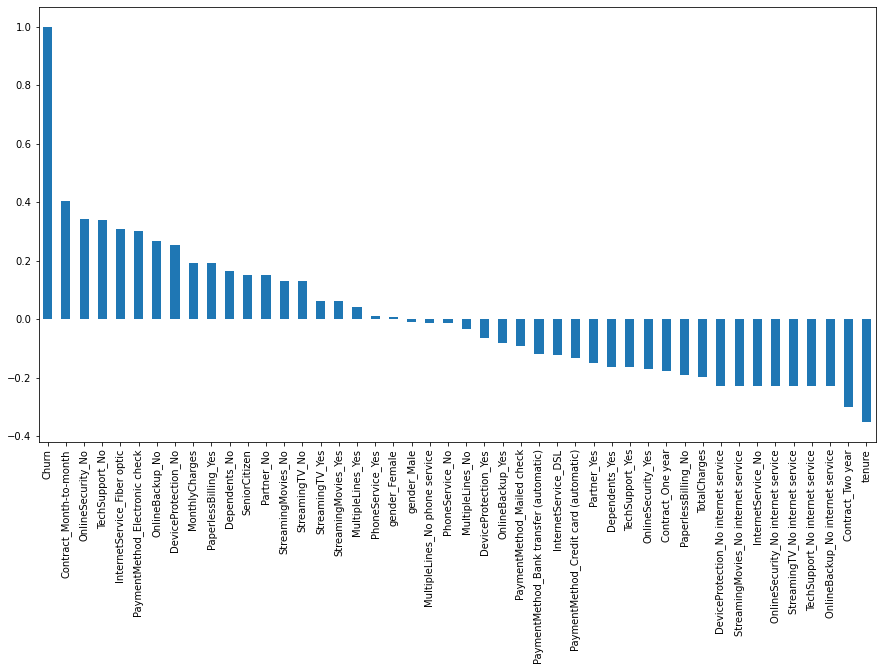

In [16]:
plt.figure(figsize=(15,8))
telecom_df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')


### Exploratory Data Analysis (EDA)


### A bar char that represents the total number of active and churned customers
The number of active customer is higher compared to the churned customer  
Around 73% of customers are active with upguard platform with 26% of customer being churned

In [17]:
churn_data = telecom_df['Churn'].value_counts()
churn_df = pd.DataFrame(churn_data)
churn_df.reset_index(inplace = True)
churn_df.columns = ['churn', 'total_number']
total = churn_df['total_number'].sum()
churn_df['percentage'] = churn_df['total_number'].apply(lambda x:(x/total)*100)
churn_df


,churn,total_number,percentage
0,No,5174,73.463013
1,Yes,1869,26.536987


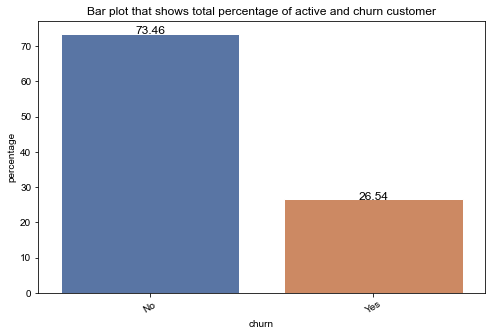

In [18]:
x = 'churn'
y= 'percentage'
df = churn_df
title = "Bar plot that shows total percentage of active and churn customer"
barplot(x, y, df, title)

### A bar char that represents the total number of male and female customers


In [19]:
gender_data = telecom_df['gender'].value_counts()
gender_df = pd.DataFrame(gender_data)
gender_df.reset_index(inplace = True)
gender_df.columns = ['gender', 'total_number']
total = gender_df['total_number'].sum()
gender_df['percentage'] = gender_df['total_number'].apply(lambda x:(x/total)*100)
gender_df

,gender,total_number,percentage
0,Male,3555,50.47565
1,Female,3488,49.52435


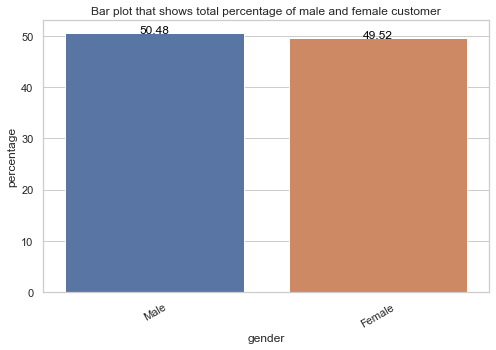

In [20]:
x = 'gender'
y= 'percentage'
df = gender_df
title = "Bar plot that shows total percentage of male and female customer"
barplot(x, y, df, title)

### Grouped bar chart that shows the active and churned customers according to the gender

- From the grouped bar chat below, it can be depicted that both male and female customer seems to have similar number of churned and active rate 


In [21]:
gender_churn_df = pd.DataFrame(telecom_df.groupby(['gender', 'Churn'])['customerID'].count())
gender_churn_df

customerID
gender Churn            
Female No           2549
       Yes           939
Male   No           2625
       Yes           930

Text(0.5, 1.0, 'Grouped bar chart for active and churned customer according to gender')

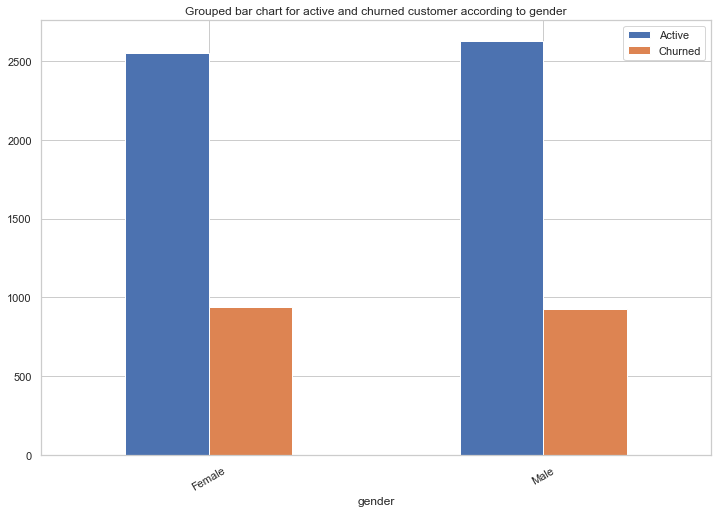

In [22]:
fig, ax = plt.subplots(figsize = (12,8))
gender_churn_df.unstack().plot(kind='bar', rot = 30, ax =ax)
ax.legend(["Active", "Churned"]);
ax.set_title("Grouped bar chart for active and churned customer according to gender")

In [23]:
senior_data = telecom_df['SeniorCitizen'].value_counts()
senior_df = pd.DataFrame(senior_data)
senior_df.reset_index(inplace = True)
senior_df.columns = ['senior_citizen', 'total_number']
total = senior_df['total_number'].sum()
senior_df['percentage'] = senior_df['total_number'].apply(lambda x:(x/total)*100)
senior_df

,senior_citizen,total_number,percentage
0,0,5901,83.785319
1,1,1142,16.214681


### A bar char that represents the total number of male and female customers


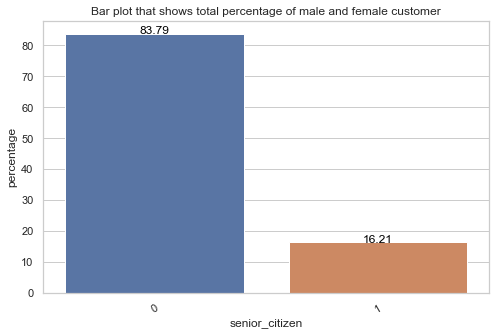

In [24]:
x = 'senior_citizen'
y= 'percentage'
df = senior_df
title = "Bar plot that shows total percentage of male and female customer"
barplot(x, y, df, title)

### Grouped bar chart that shows the active and churned customers according to the senior citizen

- From the grouped bar chart below, it can be depicted that customer who are not a senior citizen found to be more active and have more churn rate as compared to senior citizen 


In [25]:
senior_churn_df = pd.DataFrame(telecom_df.groupby(['SeniorCitizen', 'Churn'])['customerID'].count())
senior_churn_df

customerID
SeniorCitizen Churn            
0             No           4508
              Yes          1393
1             No            666
              Yes           476

Text(0.5, 1.0, 'Grouped bar chart for active and churned customer according to gender')

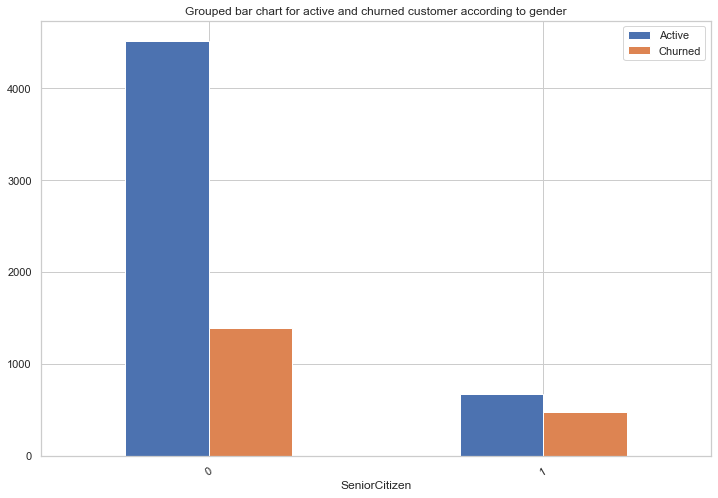

In [26]:
fig, ax = plt.subplots(figsize = (12,8))
senior_churn_df.unstack().plot(kind='bar', rot = 30, ax =ax)
ax.legend(["Active", "Churned"]);
ax.set_title("Grouped bar chart for active and churned customer according to gender")

### A histogram that shows the number of customer vs the tenure

- The customer number is found to be high and using the service for the first 1-2 months of usage and 
- the number of customer seems to be low using the service found to be low from 5 to 65 months of usage
- and, again the number of customer using the service for more than 70 months is high
- The reason behind this might be the customer is using the service based on certain contract and customers are more interested into month-to-month contract 

C:\Users\Abhiyush\anaconda3\envs\aby\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'No of Customers by their tenure')

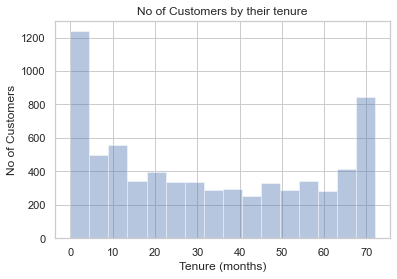

In [27]:
ax = sns.distplot(telecom_df['tenure'], kde=False)
ax.set_xlabel('Tenure (months)')
ax.set_ylabel('No of Customers')
ax.set_title('No of Customers by their tenure')

### A bar char that represents the total number of male and female customers

- From this graph, we can see that customers are more into month-to-month contract rather than long term contract
- The reason may be the customers are attracted from the offering or new schemes provided by other providers or may be customers are living in the country for few months only


In [28]:
telecom_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [29]:
contract_data = telecom_df['Contract'].value_counts()
contract_df = pd.DataFrame(contract_data)
contract_df.reset_index(inplace = True)
contract_df.columns = ['contract', 'total_number']
total = contract_df['total_number'].sum()
contract_df['percentage'] = contract_df['total_number'].apply(lambda x:(x/total)*100)
contract_df

,contract,total_number,percentage
0,Month-to-month,3875,55.019168
1,Two year,1695,24.066449
2,One year,1473,20.914383


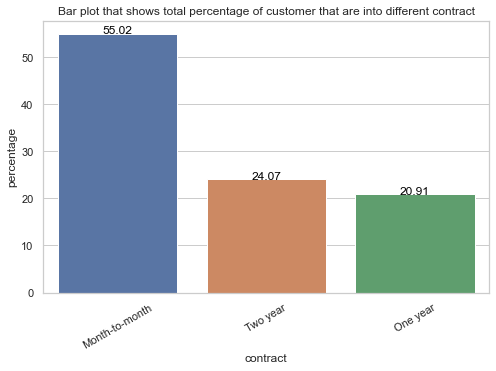

In [30]:
x = 'contract'
y= 'percentage'
df = contract_df
title = "Bar plot that shows total percentage of customer that are into different contract"
barplot(x, y, df, title)

### Grouped bar chart that shows the active and churned customers according to the contract

- From the grouped bar chart below, it can be depicted that customer who are found to be more active compared to customers in other contract
- Evethough, monthwise customers are high, the churned rate who are in month-to-month contract are huge as compared to the customer who are in long term contract
- And, the customer who are in two year contract is found to even less churn rate and high active rate

In [31]:
contract_churn_df = pd.DataFrame(telecom_df.groupby(['Contract', 'Churn'])['customerID'].count())
contract_churn_df

customerID
Contract       Churn            
Month-to-month No           2220
               Yes          1655
One year       No           1307
               Yes           166
Two year       No           1647
               Yes            48

Text(0.5, 1.0, 'Grouped bar chart for active and churned customer according to contract')

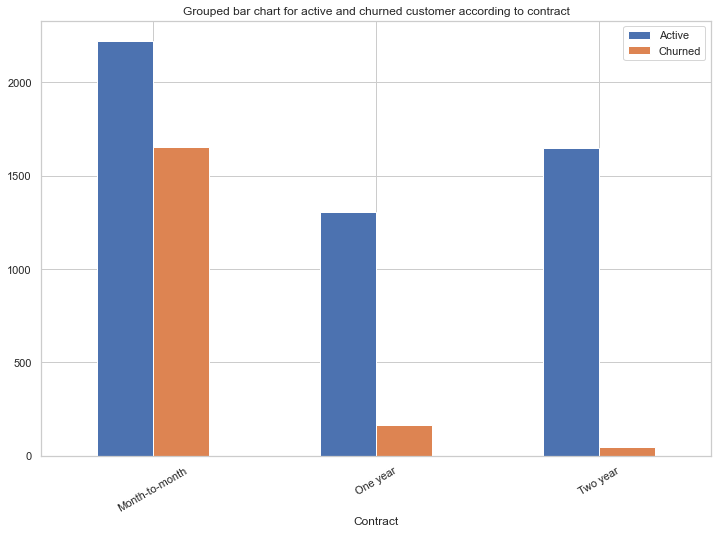

In [32]:
fig, ax = plt.subplots(figsize = (12,8))
contract_churn_df.unstack().plot(kind='bar', rot = 30, ax =ax)
ax.legend(["Active", "Churned"]);
ax.set_title("Grouped bar chart for active and churned customer according to contract")

### A bar char that represents the total number of customers according to different service


********************
PhoneService
********************
No. of unique value for column 'PhoneService'::2


Yes    6361
No      682
Name: PhoneService, dtype: int64
********************
MultipleLines
********************
No. of unique value for column 'MultipleLines'::3


No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
********************
InternetService
********************
No. of unique value for column 'InternetService'::3


Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
********************
OnlineSecurity
********************
No. of unique value for column 'OnlineSecurity'::3


No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
********************
OnlineBackup
********************
No. of unique value for column 'OnlineBackup'::3


No                     3088
Yes                    2429
No internet service  

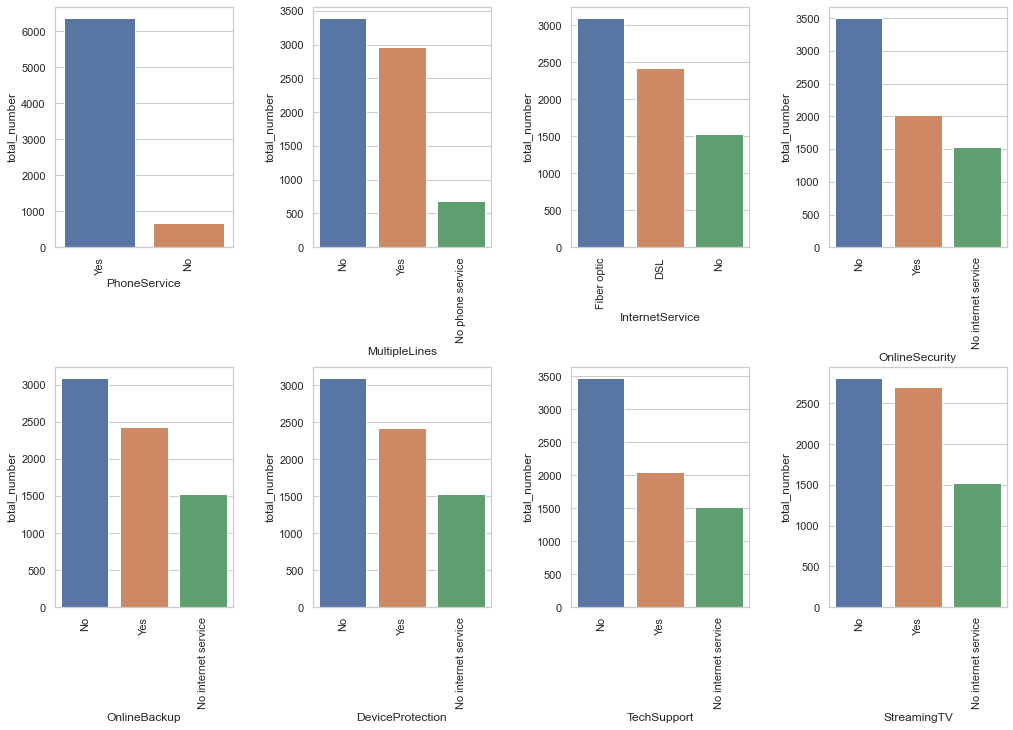

In [33]:
services = ['PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies']

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15,10))
sns.set_theme(style="whitegrid")
fig.tight_layout(pad=4, w_pad=4, h_pad=8)

for column, ax in zip(services, axes.flatten()):
    data = get_summary(telecom_df, all_features = False, feature_name=column)
    df = pd.DataFrame(data)
    df.reset_index(inplace = True)
    df.columns = [column, 'total_number']
    
    g = sns.barplot(x=column, y="total_number", data=df, ax = ax)
    g.tick_params(axis='x', rotation=90)

### Graph that shows the distribution of active and churned customer according to monthly charge

- From the graph, it can be seen that the customer churn rate is high when the monthy charge is high and 
- the churn rate is low when the monthly charge is low
- the reason may be customer wants to use the service in low cost as possible or the service provided by the provider in higher cost is not good enough

Text(0.5, 1.0, 'Distribution of monthly charges by churn rate')

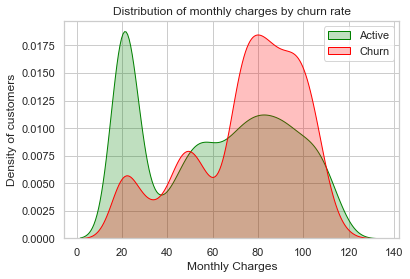

In [34]:
ax = sns.kdeplot(telecom_df['MonthlyCharges'][(telecom_df["Churn"] == 'No') ],
                color="Green", shade = True)
ax = sns.kdeplot(telecom_df['MonthlyCharges'][(telecom_df["Churn"] == 'Yes') ],
                ax =ax, color="Red", shade= True)
ax.legend(["Active","Churn"],loc='upper right')
ax.set_ylabel('Density of customers')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn rate')

### Graph that shows the distribution of active and churned customer according to total charge

- From the graph, it can be seen that the customer churn rate is high when the total charge is low and 
- the churn rate is low when the total charge is low

Text(0.5, 1.0, 'Distribution of Total charges by churn rate')

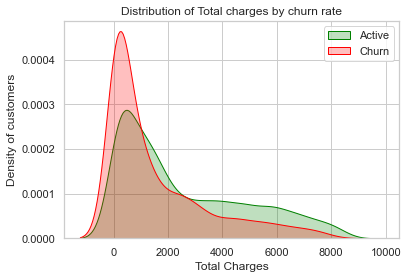

In [35]:
ax = sns.kdeplot(telecom_df['TotalCharges'][(telecom_df["Churn"] == 'No') ],
                color="Green", shade = True)
ax = sns.kdeplot(telecom_df['TotalCharges'][(telecom_df["Churn"] == 'Yes') ],
                ax =ax, color="Red", shade= True)
ax.legend(["Active","Churn"],loc='upper right')
ax.set_ylabel('Density of customers')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of Total charges by churn rate')

# Predictive models

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
\
from sklearn import metrics

### Preparing the datasets for predictive models

In [38]:
X = telecom_df_dummies.drop(columns = ['Churn'])
y = telecom_df_dummies['Churn'].values

# Data normalization: normalizing the data in the scale of 0 to 1
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

# Create Train & Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)

### 1. Logistic regression

In [39]:
# Running logistic regression model
model_logistic = LogisticRegression()
result = model_logistic.fit(X_train, y_train)

In [40]:
prediction_test = model_logistic.predict(X_test)
# Print the prediction accuracy
print("Accuracy::", metrics.accuracy_score(y_test, prediction_test))

Accuracy:: 0.7898921067575241


### Summary from Logistic regression

- Logistic regression is achieving the accuracy of 78.98%
- And, looking for the weights taken into consideration by logistic regression model, higher weight is given to totalCharges and has positive relation which means higher the total charge greater will be the churn rate
- Similarly, people who are is month to month contract is likely to have higher churn rate
- Whereas there is negative relation with tenure which means higher the tenure period lower will be the churn rate

<AxesSubplot:>

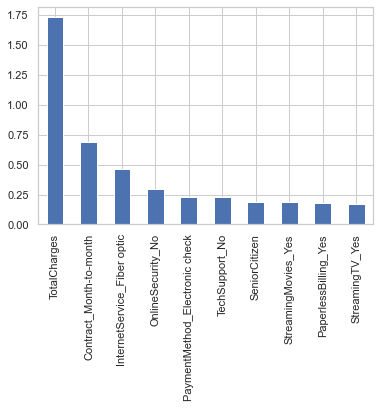

In [41]:
# To get the weights of all the variables
weights = pd.Series(model_logistic.coef_[0],
                 index=X.columns.values)
weights.sort_values(ascending = False)[:10].plot(kind='bar')

<AxesSubplot:>

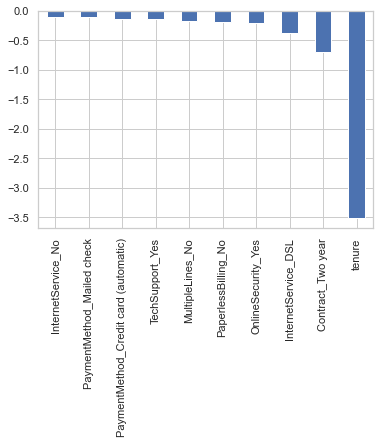

In [42]:
weights.sort_values(ascending = False)[-10:].plot(kind='bar')


### 2. Random forest

In [43]:
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.7938671209540034


### Summary from Random forest classifier

   - From the importance plot, we can see that random forest classifier has given importance to month-to-month contract, tenure, totalCharges while making a prediction for churn 
   - The features that is taken into consideration by the random forest is similar to the logistic regression and also aligns with the Exploratory Data Analysis

<AxesSubplot:>

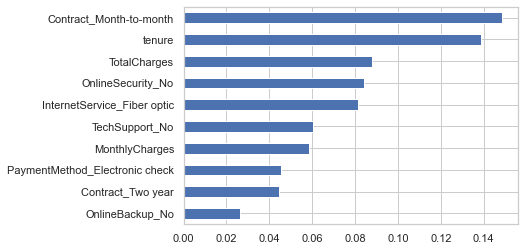

In [44]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

### 3. Support Vector Machine

In [46]:
from sklearn.svm import SVC

model_svm = SVC(kernel='linear') 
model_svm.fit(X_train,y_train)
preds = model_svm.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.7898921067575241

### 4. ADA Boost

In [48]:
# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
model_ada = AdaBoostClassifier()
model_ada.fit(X_train,y_train)
preds = model_ada.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.7881885292447472